In [32]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [33]:
# Reading CSV file

df = pd.read_csv("movies.csv")

In [34]:
# Checking for null values in each column

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print(f"{col} - {round(missing) * 100}%")

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [35]:
# Checking data types in each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [36]:
# Changing votes, budget, gross, and runtime to type int64

changeColTypes = ["votes", "budget", "gross", "runtime"]

for col in changeColTypes:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype("int64")

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [39]:
# Sorting dataframe to show the highest grossing movies first

df = df.sort_values(by=["gross"], ascending=False)

Text(0, 0.5, 'Gross (Billion)')

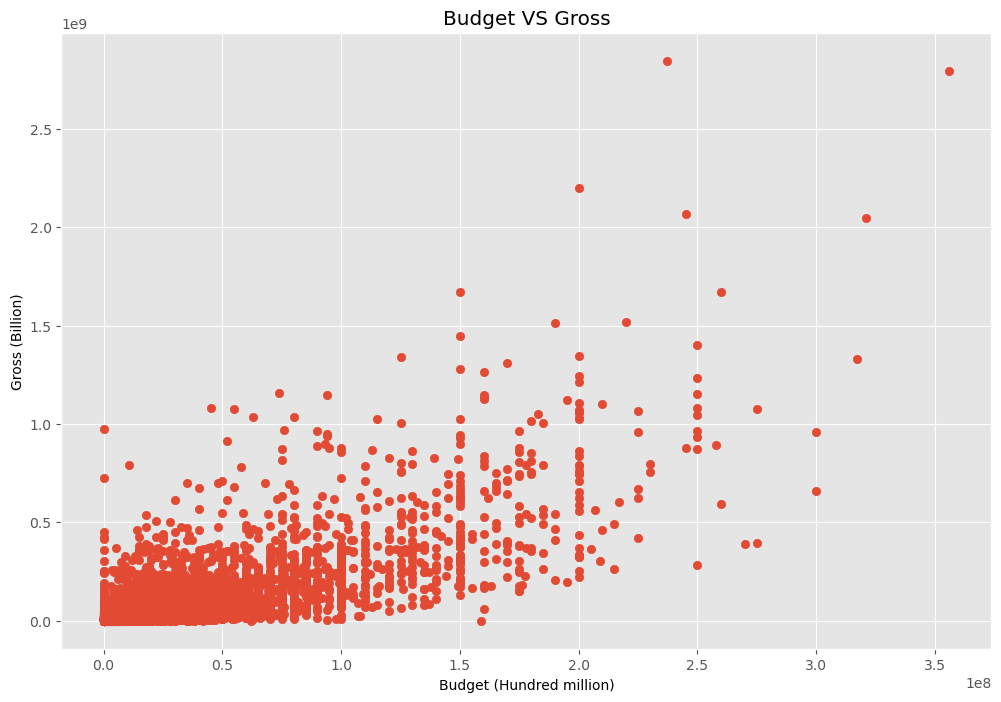

In [49]:
# Budget VS Gross as a Scatter Plot

plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget VS Gross")
plt.xlabel("Budget (Hundred million)")
plt.ylabel("Gross (Billion)")

[Text(0.5, 0, 'Budget (Hundred Million)'), Text(0, 0.5, 'Gross (Billion)')]

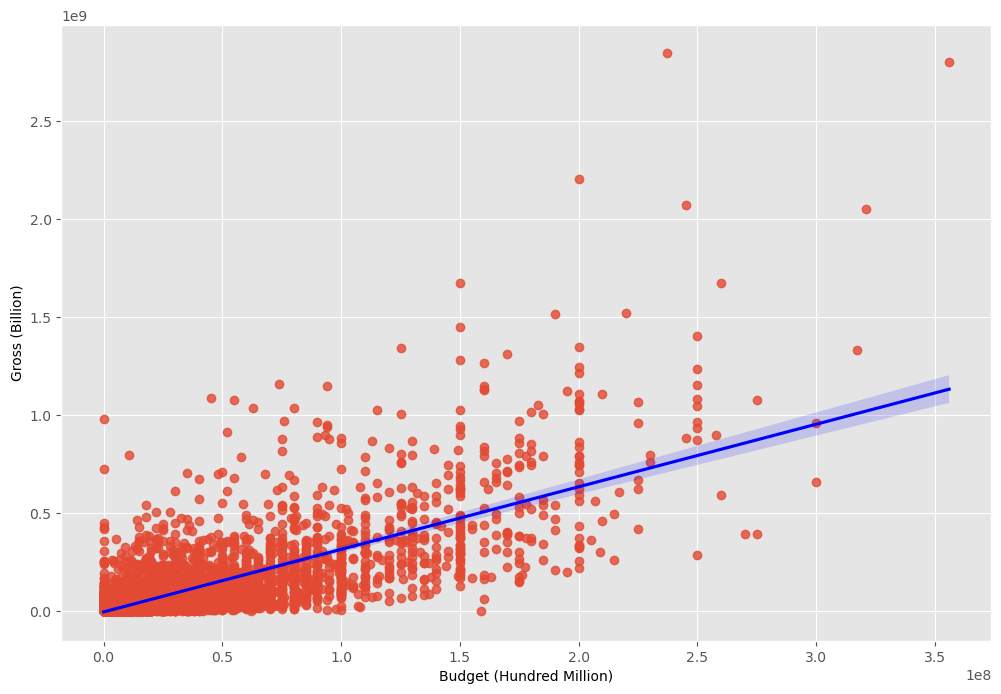

In [55]:
# Checking correlation with regression line

budgetVsGrossRegline = sns.regplot(x="budget", y="gross", data=df, line_kws={"color": "blue"})
budgetVsGrossRegline.set(xlabel="Budget (Hundred Million)", ylabel="Gross (Billion)")

C:\Users\eirfa\AppData\Local\Temp\ipykernel_20752\3574896715.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(120.72222222222221, 0.5, 'MVariables')

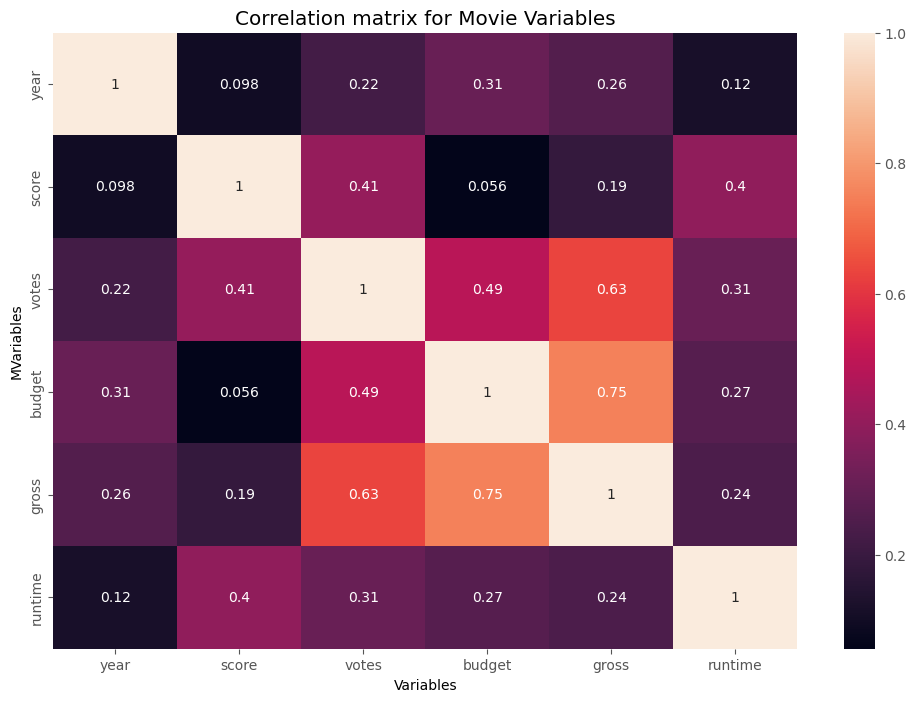

In [56]:
# Using a Correlation Matrix and Heat map to visually compare the strength of correlations between different variables in the dataframe

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movie Variables")
plt.xlabel("Variables")
plt.ylabel("MVariables")